# Listing 5.1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.math as math

In [2]:
DTYPE = tf.float32

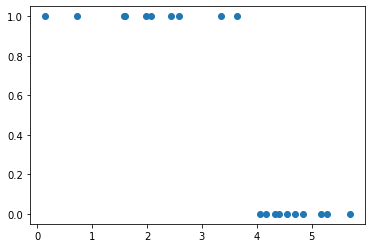

In [3]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)

xs = np.append(x_label0, x_label1)

labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000
momentum = 0.0

In [5]:
X = tf.constant(xs, dtype=DTYPE)
Y = tf.constant(labels, dtype=DTYPE)

In [6]:
@tf.function
def model(X, w):
    return math.add(
        math.multiply(w[1], math.pow(X, 1)),
        math.multiply(w[0], math.pow(X, 0))
    )

In [7]:
w = tf.Variable([0., 0.], dtype=DTYPE, name='parameters')
w

<tf.Variable 'parameters:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [8]:
y_model = lambda: model(X, w)

In [9]:
cost = lambda: tf.reduce_sum(math.square(Y - y_model()))

In [10]:
train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

# Listing 5.2 Executing the graph

In [11]:
for epoch in range(training_epochs):
    train_op.minimize(cost, w)

In [12]:
w

<tf.Variable 'parameters:0' shape=(2,) dtype=float32, numpy=array([ 1.4161924 , -0.27219844], dtype=float32)>

In [28]:
w_val = w.numpy()
print('learned parameters: ', w_val)

learned parameters:  [ 1.4161924  -0.27219844]


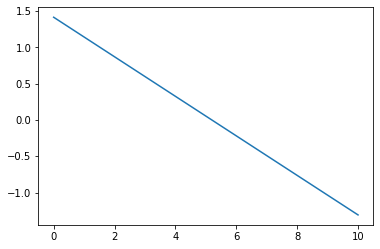

In [19]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()

# Listing 5.3 Measuring Accuracy

In [33]:
correct_prediction = math.equal(Y, tf.cast(tf.greater(y_model(), 0.5), DTYPE))
print('correct prediction: ', correct_prediction.numpy())

correct prediction:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True]


In [32]:
accuracy = math.reduce_mean(tf.cast(correct_prediction, DTYPE))
print('accuracy: ', accuracy.numpy())

accuracy:  0.95


# Listing 5.4

learned parameters:  [ 0.80212545 -0.06927848]


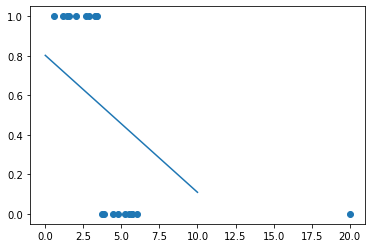

In [34]:
x_label0 = np.append(np.random.normal(5, 1, 9), 20)
x_label1 = np.random.normal(2, 1, 10)

xs = np.append(x_label0, x_label1)

labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

X = tf.constant(xs, dtype=DTYPE)
Y = tf.constant(labels, dtype=DTYPE)
train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
for epoch in range(training_epochs):
    train_op.minimize(cost, w)
w_val = w.numpy()
print('learned parameters: ', w_val)
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()